https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

# The Random Forest Classifier

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. 

The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.

Bagging (Bootstrap Aggregation) — Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.

Feature Randomness — In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.

#### So in our random forest, we end up with trees that are not only trained on different sets of data (thanks to bagging) but also use different features to make decisions.

## Decision Trees

The technical details of a decision tree are in how the questions about the data are formed. In the CART algorithm, a decision tree is built by determining the questions (called splits of nodes) that, when answered, lead to the greatest reduction in Gini Impurity. What this means is the decision tree tries to form nodes containing a high proportion of samples (data points) from a single class by finding values in the features that cleanly divide the data into classes.

#### Effectively, a decision tree is a non-linear model built by constructing many linear boundaries.

In [1]:
import numpy as np
import pandas as pd

#create a simple dataset 

X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])

y = np.array([0, 1, 1, 1, 0, 1])

Text(0.5, 1.0, 'Data')

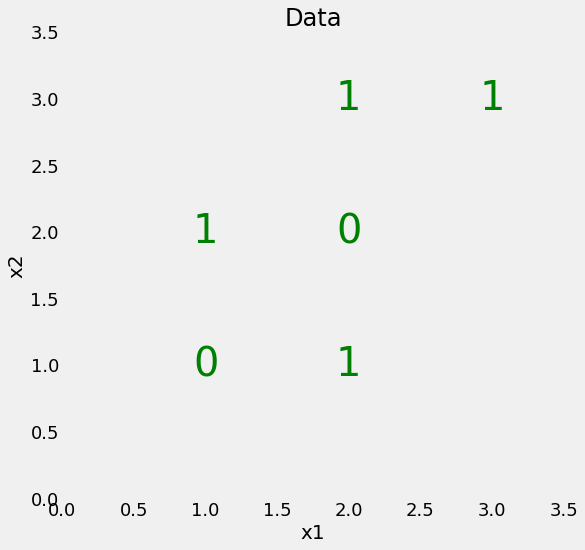

In [3]:
#see how the data looks #cannot classify using a linear line but can using a sequence of linear lines
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize = (8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'g',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Data', size = 24)

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier()
tree.fit(X, y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 9 nodes with maximum depth 3.


In [6]:
print(f'Model Accuracy: {tree.score(X, y)}')

Model Accuracy: 1.0


We see that it gets 100% accuracy on training data, which is what we expect because we gave it the answers (y) for training and did not limit the depth of the tree. It turns out this ability to completely learn the training data can be a downside of a decision tree because it may lead to overfitting as we’ll discuss later.


### Visualize Decision Tree

In [7]:
from sklearn.tree import export_graphviz

# Export as dot
export_graphviz(tree, 'tree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True)

In [8]:
from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);

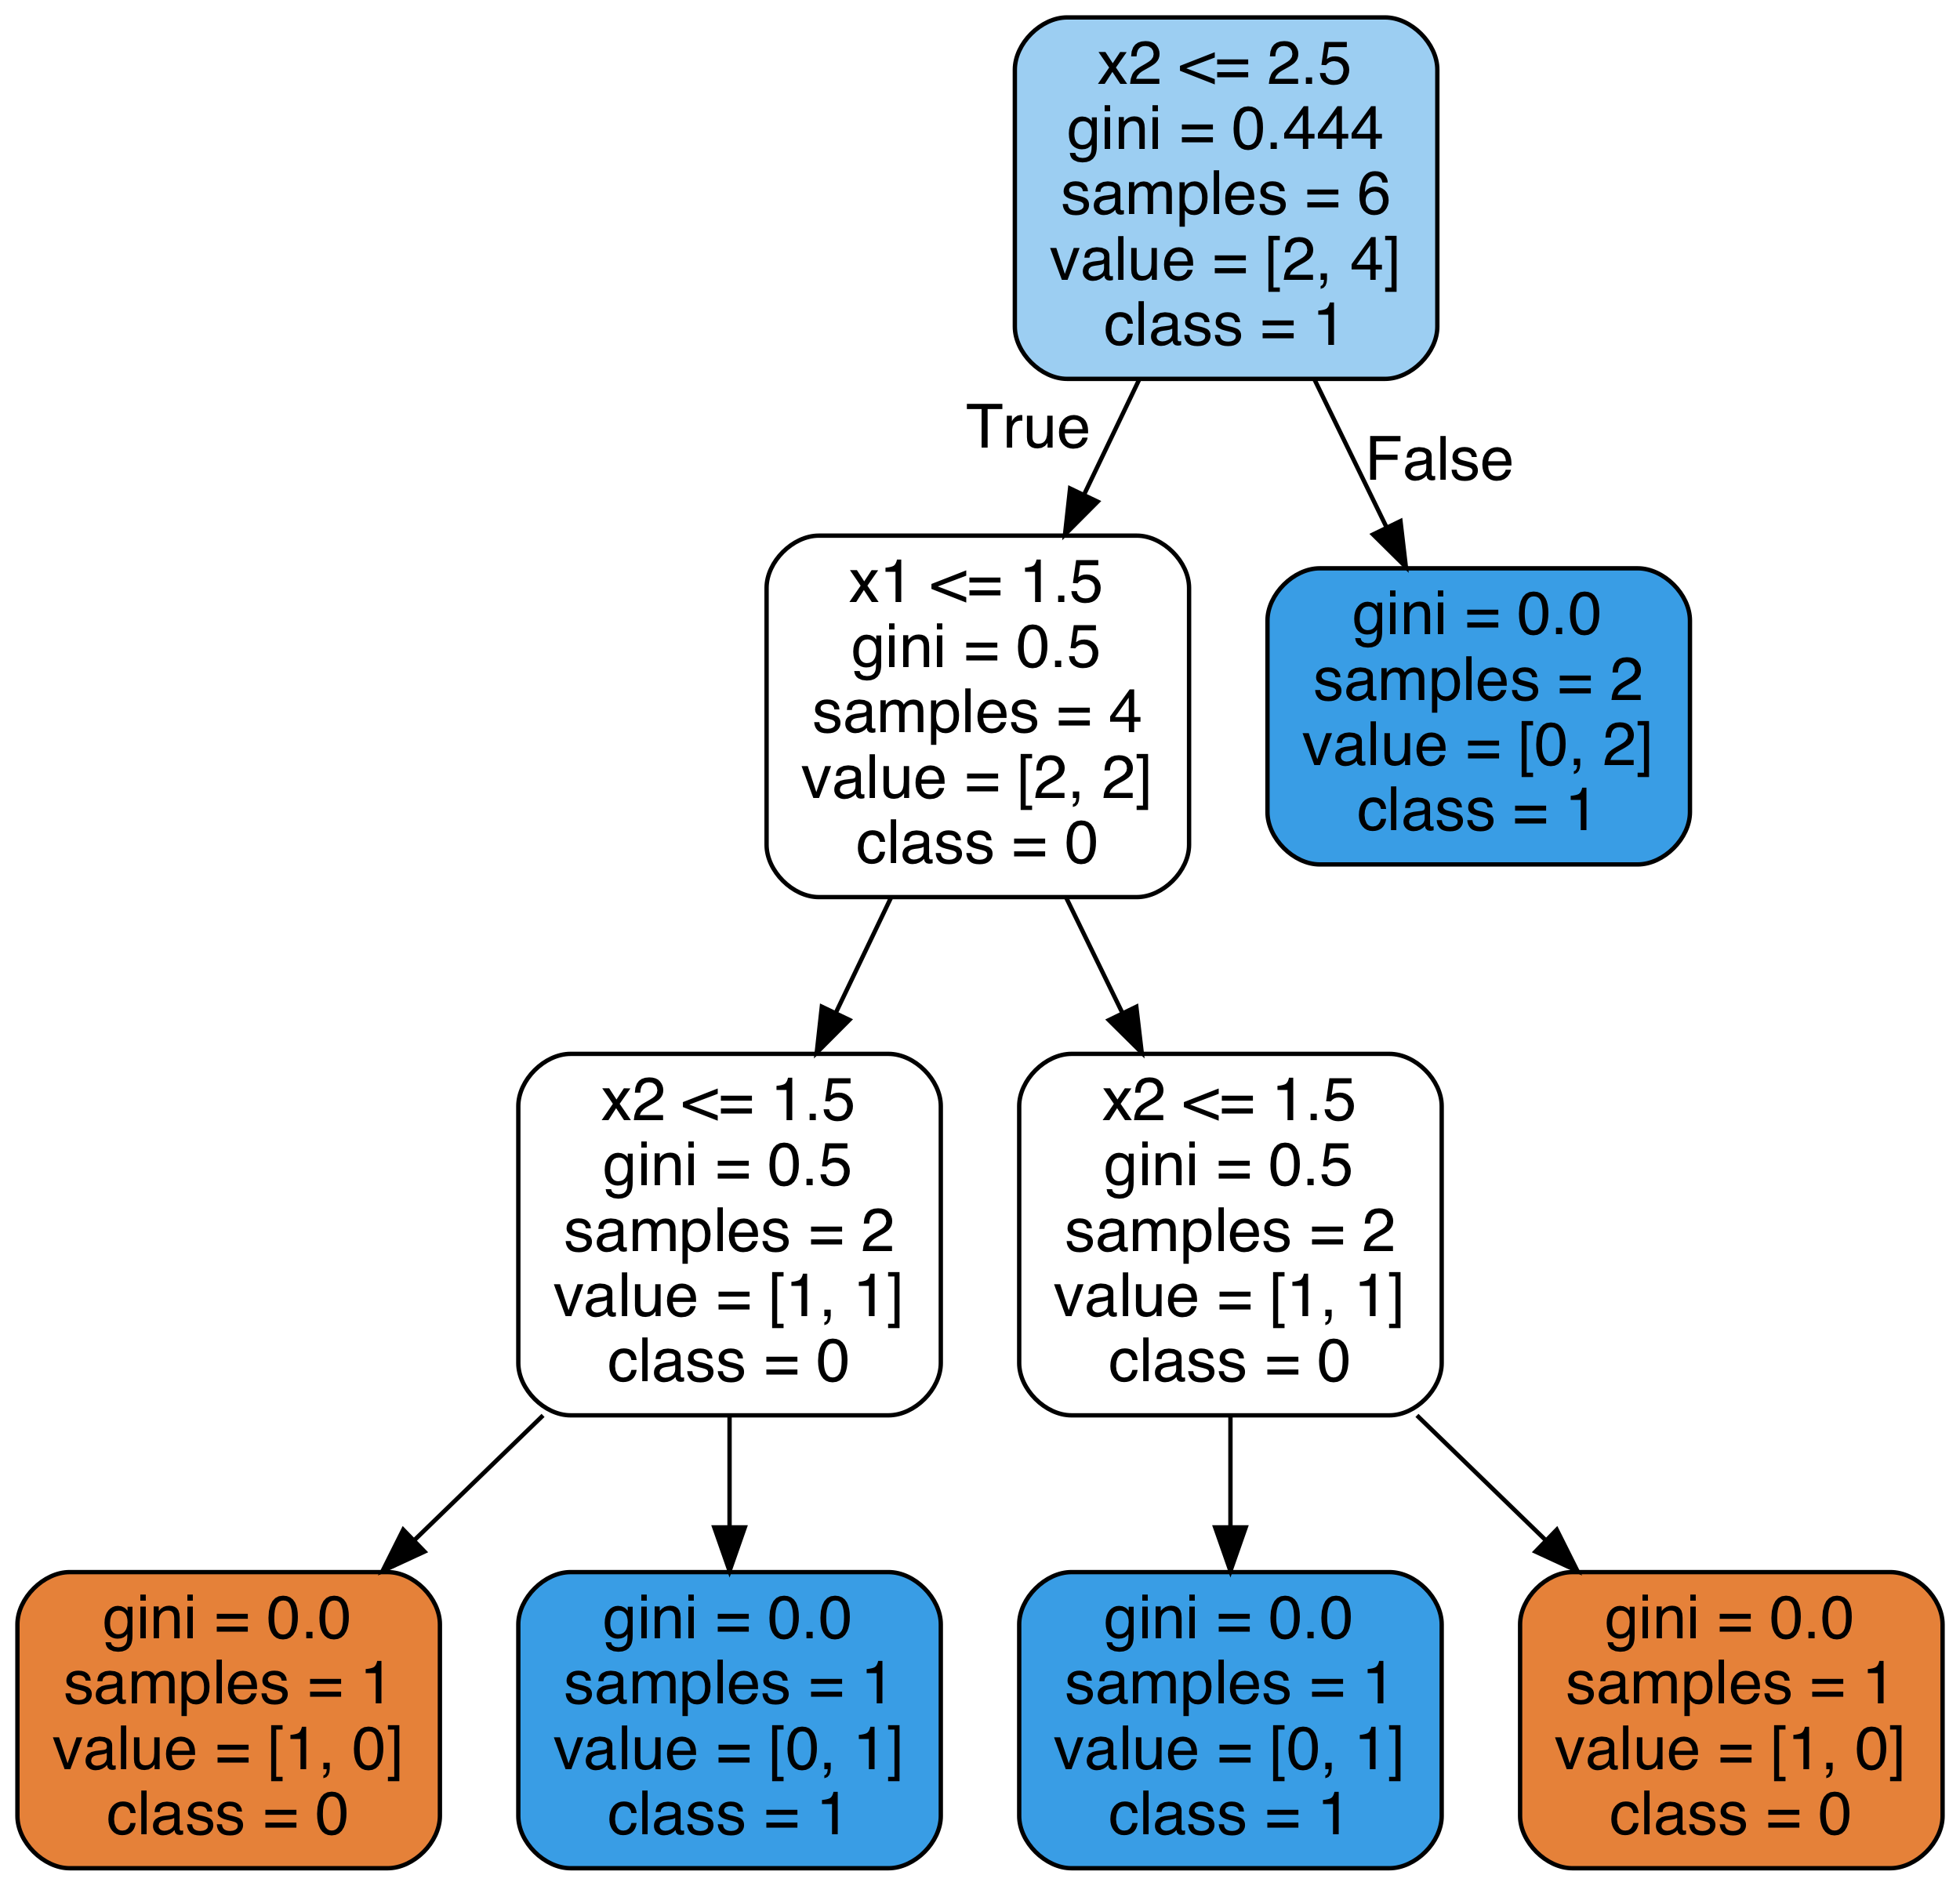

In [9]:

from IPython.display import Image
Image('tree.png')

### Limit Maximum Depth

In practice, we usually want to limit the maximum depth of the decision tree (even in a random forest) so the tree can generalize better to testing data. Although this will lead to reduced accuracy on the training data, it can improve performance on the testing data.

In [11]:
# Limit maximum depth and train
short_tree = DecisionTreeClassifier(max_depth = 2)
short_tree.fit(X, y)

print(f'Model Accuracy: {short_tree.score(X, y)}')

Model Accuracy: 0.6666666666666666


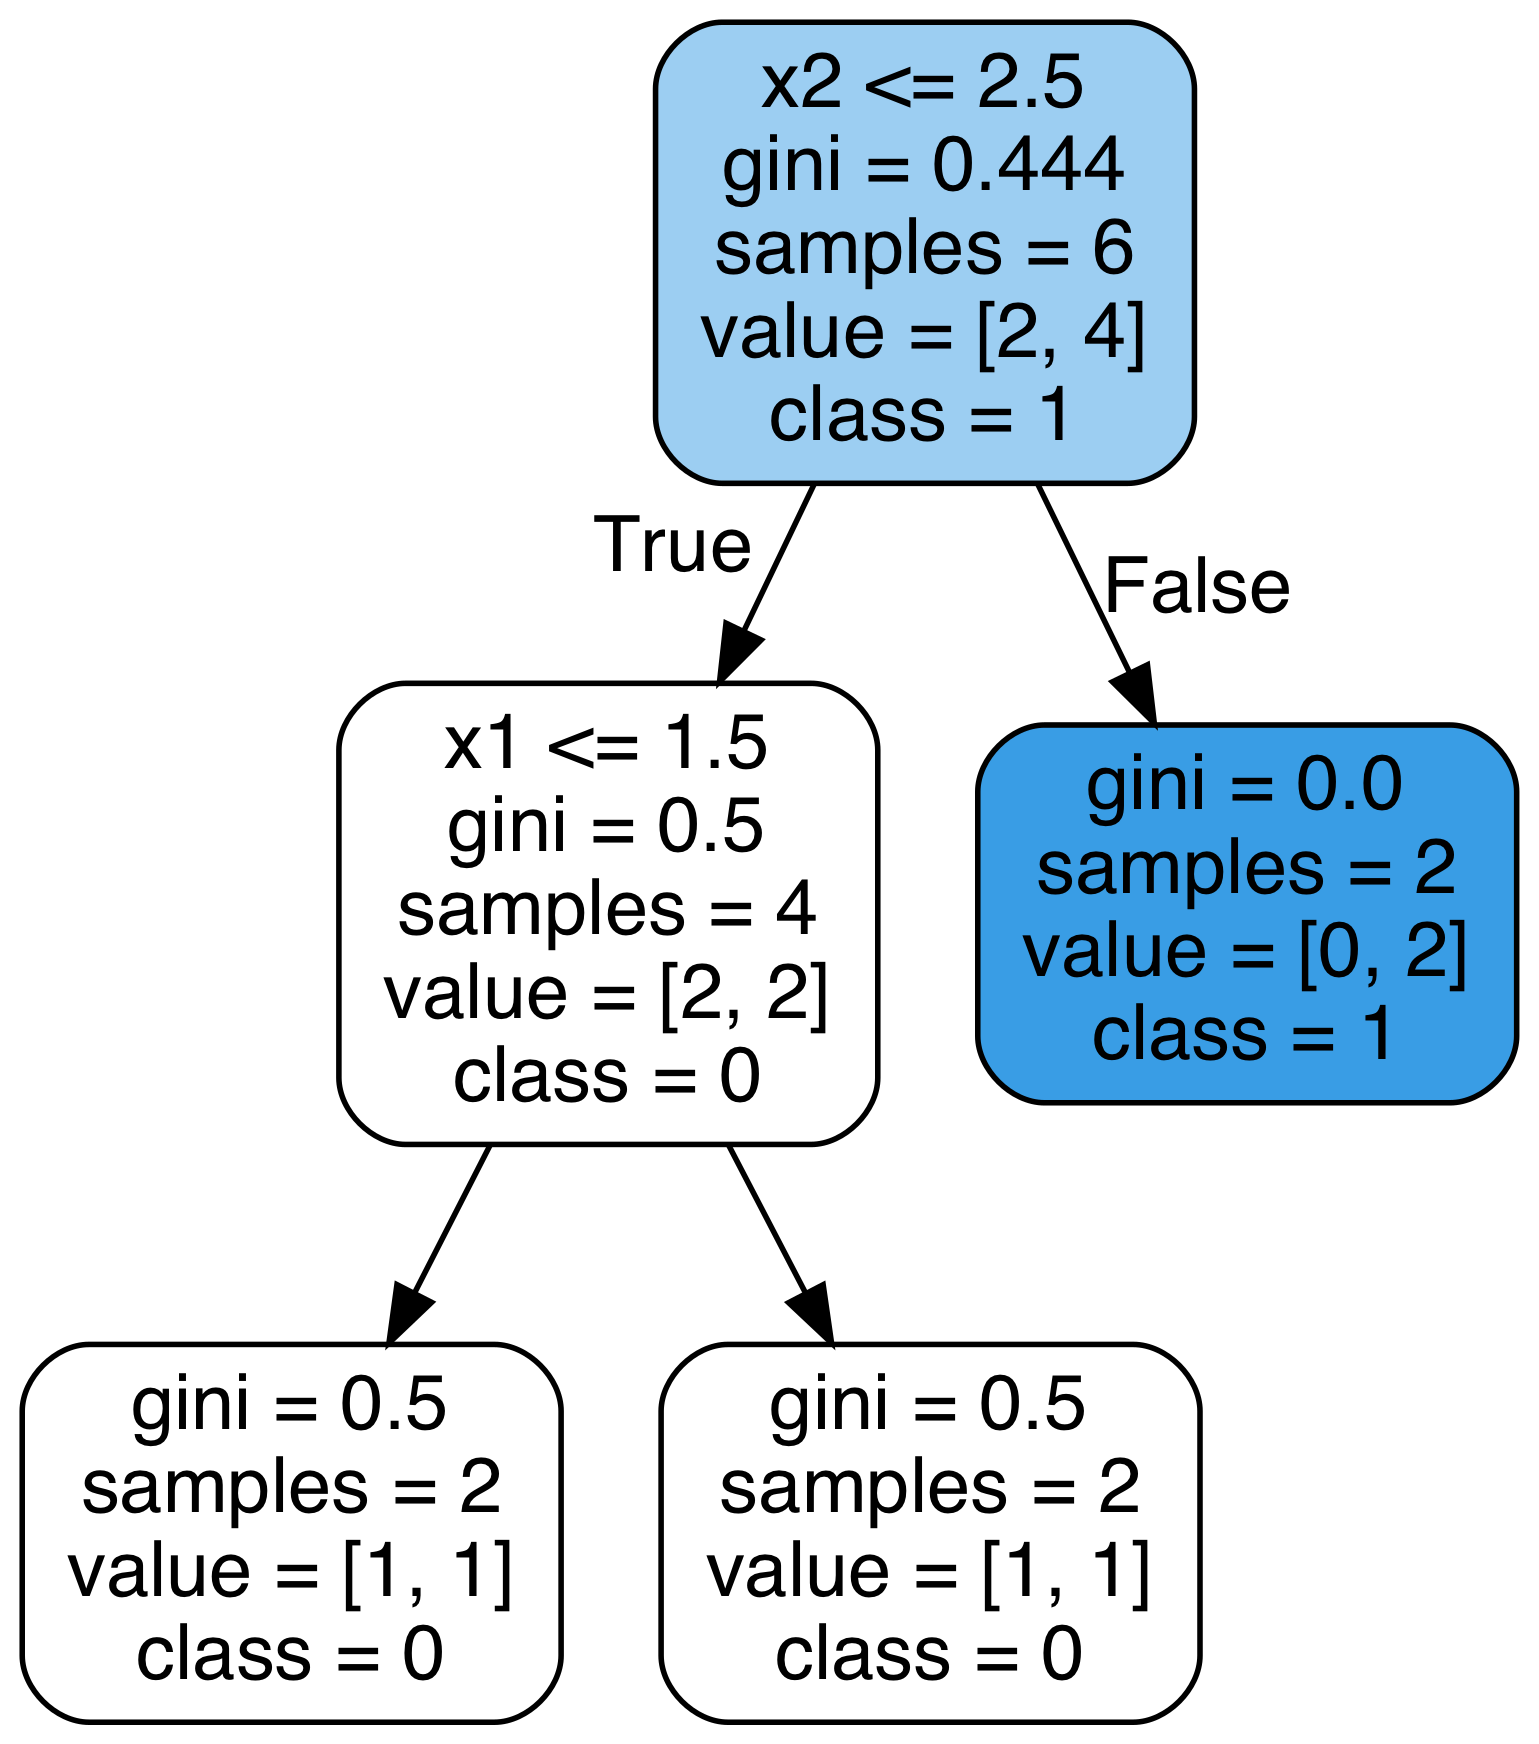

In [12]:
# Export as dot
export_graphviz(short_tree, 'shorttree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True)

call(['dot', '-Tpng', 'shorttree.dot', '-o', 'shorttree.png', '-Gdpi=400']);
Image('shorttree.png')

This is an example of the bias - variance tradeoff in machine learning. A model with high variance has learned the training data very well but often cannot generalize to new points in the test set. On the other hand, a model with high bias has not learned the training data very well because it does not have enough complexity. This model will also not perform well on new points.

### Data 

The following data set is from the Centers for Disease Control and Prevention (CDC) and includes socioeconomic and lifestyle indicators for hundreds of thousands of individuals. The objective is to predict the overall health of an individual: either 0 for poor health or 1 for good health. We'll limit the data to 100,000 individuals to speed up training.

https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system

In [30]:
df = pd.read_csv('2015.csv')
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [31]:
df = df.select_dtypes('number')
df.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [32]:
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()
df = df.rename(columns = {'_RFHLTH': 'label'})
df['label'].value_counts()

1.0    358072
0.0     82137
Name: label, dtype: int64

In [33]:
# Remove columns with missing values
df = df.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'])

In [34]:
from sklearn.model_selection import train_test_split

# Extract the labels
labels = np.array(df.pop('label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3)

In [35]:

train = train.fillna(train.mean())
test = test.fillna(train.mean())

# Features for feature importances
features = list(train.columns)

In [36]:
# Train tree
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 54685 nodes with maximum depth 68.


In [37]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [38]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.679719128850748


In [39]:
print(f'Baseline ROC AUC: {roc_auc_score(test_labels, [1 for _ in range(len(test_labels))])}')

Baseline ROC AUC: 0.5



Our model does outperform a baseline guess, but we can see it has severely overfit to the training data, acheiving perfect ROC AUC.

### Gini Impurity

Gini Impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset. It’s calculated as

$G = \sum_{i=1}^C p(i) * (1 - p(i))$

where CC is the number of classes and p(i)p(i) is the probability of randomly picking an element of class ii.

When training a decision tree, the best split is chosen by maximizing the Gini Gain, which is calculated by subtracting the weighted impurities of the branches from the original impurity.

### Information gain

Information gain = Entr